In [11]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
font_cache_dir = os.path.join(mpl.get_cachedir(), 'fontList.json')
if os.path.exists(font_cache_dir):
    os.remove(font_cache_dir)
import matplotlib.font_manager as fm
font_path = "/home/sumida/PhD/Python Fonts/Neutraface2Display-Medium.otf"
font_prop = fm.FontProperties(fname=font_path)
fm.fontManager.addfont(font_path)
neutra_face = font_prop.get_name()
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = [neutra_face]
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = neutra_face
plt.rcParams['mathtext.it'] = f'{neutra_face}:italic'
plt.rcParams['mathtext.bf'] = f'{neutra_face}:bold'

/tmp/ipykernel_2885/2812589487.py:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap_f = get_cmap("viridis")
/tmp/ipykernel_2885/2812589487.py:69: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap_t = get_cmap("plasma")


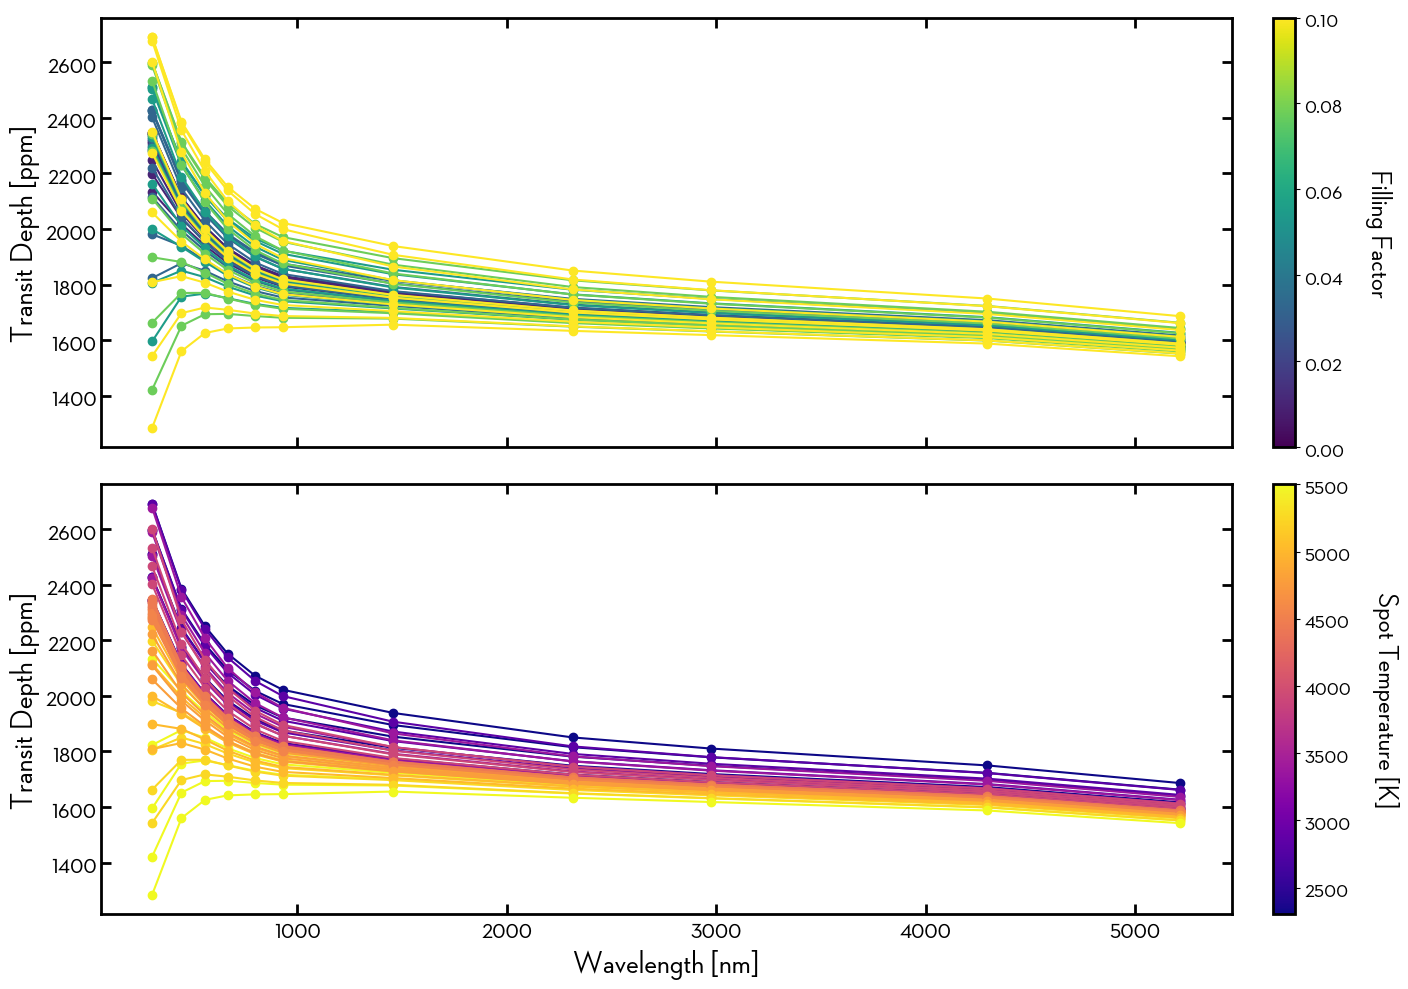

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap, ScalarMappable
from matplotlib.colors import Normalize
import os

# Configura os parâmetros visuais padrão
plt.rcParams['axes.linewidth'] = 2  # Aumenta a espessura das bordas dos eixos

# Caminho para o arquivo de resultados
file_path = "simulation_results_K2-136c_Kurucz.txt"

# Verifica se o arquivo existe
if not os.path.exists(file_path):
    raise FileNotFoundError(f"The file {file_path} does not exist.")

# Carregar os dados (assumindo valores separados por vírgula e com cabeçalho)
data = np.loadtxt(file_path, delimiter=',', skiprows=1)
f_spot_array, tempSpot_array, lambdaEff_nm, D_lambda, epsilon_Rackham, epsilon_ourWork = data.T

# Cria a figura com dois subplots (empilhados verticalmente)
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(15, 10), sharex=True)

###############################################################################
# Primeiro subplot: Linhas coloridas conforme o filling factor (f_spot)
###############################################################################
# Agrupa as simulações únicas (combinações de f_spot e tempSpot)
unique_simulations = np.unique(np.column_stack((f_spot_array, tempSpot_array)), axis=0)

# Escolhe um colormap e cria o normalizador para f_spot
cmap_f = get_cmap("viridis")
norm_f = Normalize(f_spot_array.min(), f_spot_array.max())

# Loop para plotar cada simulação
for f_spot, tempSpot in unique_simulations:
    mask = (f_spot_array == f_spot) & (tempSpot_array == tempSpot)
    lambdaEff_sim = lambdaEff_nm[mask]
    D_lambda_sim = D_lambda[mask]
    
    # Define a cor com base no filling factor
    color = cmap_f(norm_f(f_spot))
    ax1.plot(lambdaEff_sim, D_lambda_sim, marker='o', linestyle='-', color=color)

# Adiciona a colorbar para o filling factor
sm_f = ScalarMappable(cmap=cmap_f, norm=norm_f)
sm_f.set_array(f_spot_array)
cbar1 = fig.colorbar(sm_f, ax=ax1, orientation='vertical', pad=0.03)
cbar1.set_label("Filling Factor", fontsize=21, fontweight='bold', labelpad=15)
cbar1.ax.tick_params(labelsize=17)
cbar1.ax.yaxis.label.set_rotation(270)  
cbar1.ax.yaxis.label.set_verticalalignment('bottom')  

# Personaliza o primeiro subplot
ax1.set_title("", fontsize=23, fontweight='bold')
ax1.set_xlabel("", fontsize=23, fontweight='bold')
ax1.set_ylabel("Transit Depth [ppm]", fontsize=23, fontweight='bold')
ax1.tick_params(axis="x", direction="in", labelsize=19, width=2, length=7, pad=3, top=True)
ax1.tick_params(axis="y", direction="in", labelsize=19, width=2, length=7, pad=3, right=True)

###############################################################################
# Segundo subplot: Linhas coloridas conforme a spot temperature (T_spot)
###############################################################################
# Filtra os valores válidos de temperatura (não NaN) para a normalização
valid_tempSpot = tempSpot_array[~np.isnan(tempSpot_array)]
if len(valid_tempSpot) == 0:
    raise ValueError("All temperature values are NaN. Check the data.")

# Escolhe um colormap e cria o normalizador para T_spot
cmap_t = get_cmap("plasma")
norm_t = Normalize(valid_tempSpot.min(), valid_tempSpot.max())

# Loop para plotar cada simulação (desconsiderando as que possuem temperatura NaN)
for f_spot, tempSpot in unique_simulations:
    if np.isnan(tempSpot):
        continue
    mask = (f_spot_array == f_spot) & (tempSpot_array == tempSpot)
    lambdaEff_sim = lambdaEff_nm[mask]
    D_lambda_sim = D_lambda[mask]
    
    # Define a cor com base na spot temperature
    color = cmap_t(norm_t(tempSpot))
    ax2.plot(lambdaEff_sim, D_lambda_sim, marker='o', linestyle='-', color=color)

# Adiciona a colorbar para a spot temperature
sm_t = ScalarMappable(cmap=cmap_t, norm=norm_t)
sm_t.set_array(valid_tempSpot)
cbar2 = fig.colorbar(sm_t, ax=ax2, orientation='vertical', pad=0.03)
cbar2.set_label("Spot Temperature [K]", fontsize=21, fontweight='bold', labelpad=15)
cbar2.ax.tick_params(labelsize=17)
cbar2.ax.yaxis.label.set_rotation(270)  
cbar2.ax.yaxis.label.set_verticalalignment('bottom')  

# Personaliza o segundo subplot
ax2.set_title("", fontsize=23, fontweight='bold')
ax2.set_xlabel("Wavelength [nm]", fontsize=23, fontweight='bold')
ax2.set_ylabel("Transit Depth [ppm]", fontsize=23, fontweight='bold')
ax2.tick_params(axis="x", direction="in", labelsize=19, width=2, length=7, pad=3, top=True)
ax2.tick_params(axis="y", direction="in", labelsize=19, width=2, length=7, pad=3, right=True)

# Ajusta o layout e exibe a figura
plt.tight_layout()
plt.show()

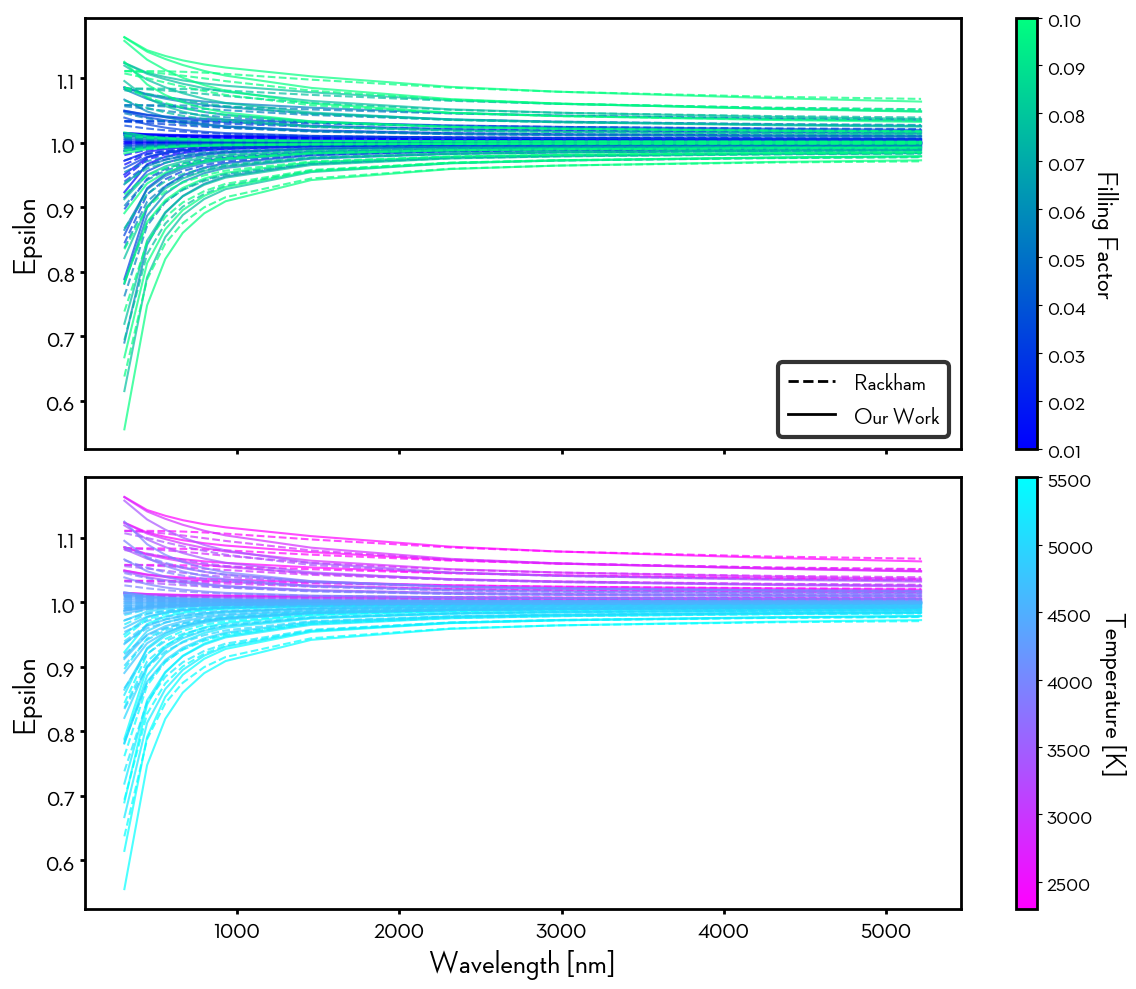

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
from matplotlib.lines import Line2D

# Aumenta a espessura das bordas dos eixos
plt.rcParams['axes.linewidth'] = 2

# Carregar e preparar os dados
data = np.loadtxt("simulation_results_K2-136c_Kurucz.txt", delimiter=',', skiprows=1)
f_spot, tempSpot, wavelength, D_lambda, epsilon_Rackham, epsilon_ourWork = data.T

# Filtrar os casos sem spots
mask = f_spot > 0
f_spot = f_spot[mask]
tempSpot = tempSpot[mask]
wavelength = wavelength[mask]
epsilon_Rackham = epsilon_Rackham[mask]
epsilon_ourWork = epsilon_ourWork[mask]

# Criar identificador único para cada simulação (formato "f_temp")
sim_ids = np.array([f"{f}_{t:.2f}" for f, t in zip(f_spot, tempSpot)])
unique_sims, indices = np.unique(sim_ids, return_inverse=True)

# Configurar figura com dois subplots
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12, 10), sharex=True)

# ================================================
# Subplot 1 - Variação do Filling Factor (ax1)
# ================================================
cmap_f = plt.get_cmap('winter')  # Colormap diferente para diferenciar
norm_f = Normalize(f_spot.min(), f_spot.max())

for i, sim in enumerate(unique_sims):
    mask_sim = indices == i
    wl = wavelength[mask_sim]
    
    sort_idx = np.argsort(wl)
    f_val = float(sim.split('_')[0])  # Extrai o filling factor
    color = cmap_f(norm_f(f_val))
    
    ax1.plot(wl[sort_idx], epsilon_Rackham[mask_sim][sort_idx], '--', color=color, alpha=0.7)
    ax1.plot(wl[sort_idx], epsilon_ourWork[mask_sim][sort_idx], '-', color=color, alpha=0.7)

# Colorbar para Filling Factor
sm_f = ScalarMappable(norm=norm_f, cmap=cmap_f)
sm_f.set_array(f_spot)
cbar1 = fig.colorbar(sm_f, ax=ax1)
cbar1.set_label('Filling Factor', fontsize=21, fontweight='bold')
cbar1.ax.tick_params(labelsize=17)
cbar1.ax.yaxis.label.set_rotation(270)  # Rotacionar o texto para a esquerda
cbar1.ax.yaxis.label.set_verticalalignment('bottom')  # Espacar adequadamente o texto e os valores por causa da rotação, com isso não precisa do labelpad

# ================================================
# Subplot 2 - Variação da Temperatura (ax2)
# ================================================
cmap_t = plt.get_cmap('cool_r')  # Mantém colormap original
norm_t = Normalize(tempSpot.min(), tempSpot.max())

for i, sim in enumerate(unique_sims):
    mask_sim = indices == i
    wl = wavelength[mask_sim]
    
    sort_idx = np.argsort(wl)
    temp_val = float(sim.split('_')[1])  # Extrai a temperatura
    color = cmap_t(norm_t(temp_val))
    
    ax2.plot(wl[sort_idx], epsilon_Rackham[mask_sim][sort_idx], '--', color=color, alpha=0.7)
    ax2.plot(wl[sort_idx], epsilon_ourWork[mask_sim][sort_idx], '-', color=color, alpha=0.7)

# Colorbar para Temperatura
sm_t = ScalarMappable(norm=norm_t, cmap=cmap_t)
sm_t.set_array(tempSpot)
cbar2 = fig.colorbar(sm_t, ax=ax2)
cbar2.set_label('Temperature [K]', fontsize=21, fontweight='bold')
cbar2.ax.tick_params(labelsize=17)
cbar2.ax.yaxis.label.set_rotation(270)  # Rotacionar o texto para a esquerda
cbar2.ax.yaxis.label.set_verticalalignment('bottom')  # Espacar adequadamente o texto e os valores por causa da rotação, com isso não precisa do labelpad

# Configurações Comuns
for ax in [ax1, ax2]:
    ax.set_ylabel('Epsilon', fontsize=23, fontweight='bold')
    ax.tick_params(axis="both", which='both', width=2, labelsize=19)
    
# Criar legenda customizada para o segundo subplot
handles = [
    Line2D([0], [0], color='black', linestyle='--', lw=2, label='Rackham'),
    Line2D([0], [0], color='black', linestyle='-', lw=2, label='Our Work')
]
legend = ax1.legend(handles=handles, loc='lower right', fontsize=17, frameon=True)

# Ajustes visuais na legenda
legend.get_frame().set_linewidth(3)  # Borda mais espessa
legend.get_frame().set_edgecolor('black')  # Cor da borda preta
legend.get_frame().set_facecolor('white')  # Fundo branco

ax2.set_xlabel('Wavelength [nm]', fontsize=23, fontweight='bold')

plt.tight_layout()
plt.show()


/tmp/ipykernel_2885/1107471020.py:69: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])
/tmp/ipykernel_2885/1107471020.py:69: UserWarning: Glyph 949 (\N{GREEK SMALL LETTER EPSILON}) missing from font(s) Neutraface 2 Display.
  plt.tight_layout(rect=[0, 0, 0.9, 1])
/home/sumida/miniconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 949 (\N{GREEK SMALL LETTER EPSILON}) missing from font(s) Neutraface 2 Display.
  fig.canvas.print_figure(bytes_io, **kw)


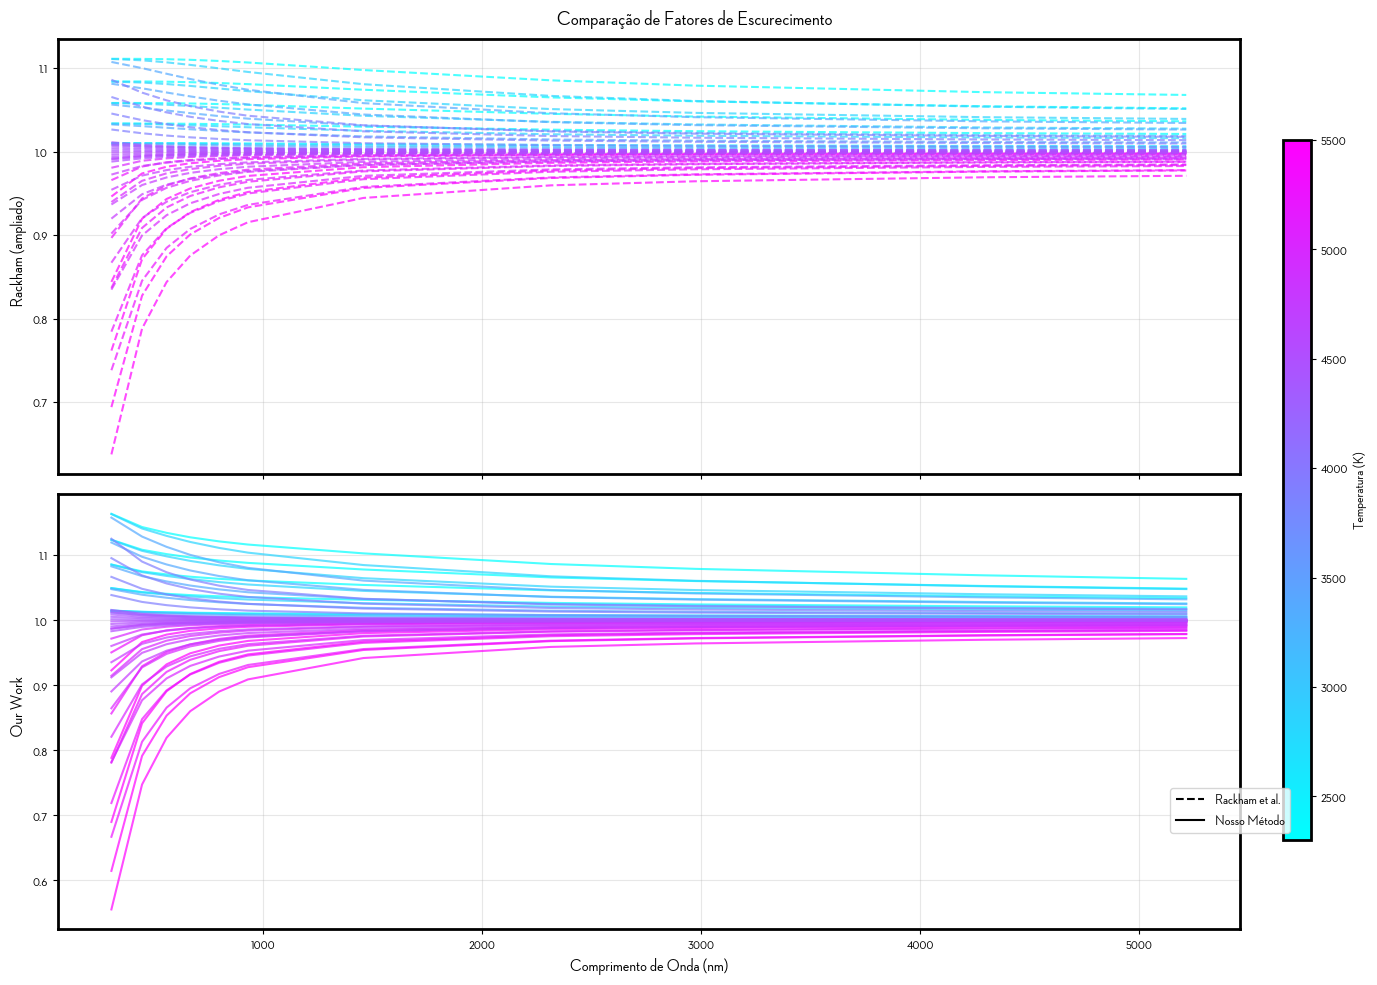

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
from matplotlib.lines import Line2D

# Load and prepare data
data = np.loadtxt("simulation_results_K2-136c_Kurucz.txt", delimiter=',', skiprows=1)
f_spot, tempSpot, wavelength, D_lambda, epsilon_Rackham, epsilon_ourWork = data.T

# Filter valid data
mask = (f_spot > 0) & (~np.isnan(epsilon_Rackham)) & (~np.isnan(epsilon_ourWork))
f_spot = f_spot[mask]
tempSpot = tempSpot[mask]
wavelength = wavelength[mask]
epsilon_Rackham = epsilon_Rackham[mask]
epsilon_ourWork = epsilon_ourWork[mask]

# Create unique simulation groups
sim_groups = np.unique(np.column_stack((f_spot, tempSpot)), axis=0)

# Configure plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)
cmap = plt.get_cmap('cool')
norm = Normalize(tempSpot.min(), tempSpot.max())

# Plotting function
def plot_simulation(ax, values, style, ylabel, ylim):
    for fs, ts in sim_groups:
        mask = (f_spot == fs) & (tempSpot == ts)
        wl = wavelength[mask]
        vals = values[mask]
        
        # Sort by wavelength
        sort_idx = np.argsort(wl)
        ax.plot(wl[sort_idx], vals[sort_idx], style,
                color=cmap(norm(ts)), alpha=0.7)
    
    ax.set_ylabel(ylabel, fontsize=12)
    ax.grid(True, alpha=0.3)
    #ax.set_ylim(ylim)

# Plot Rackham (top) with amplified scale
plot_simulation(ax1, epsilon_Rackham, '--', 
               'ε Rackham (ampliado)', 
               (epsilon_Rackham.min()-0.0005, epsilon_Rackham.max()+0.0005))

# Plot Our Work (bottom)
plot_simulation(ax2, epsilon_ourWork, '-', 
               'ε Our Work', 
               (epsilon_ourWork.min()-0.002, epsilon_ourWork.max()+0.002))

# Common settings
ax2.set_xlabel('Comprimento de Onda (nm)', fontsize=12)
fig.suptitle('Comparação de Fatores de Escurecimento', fontsize=14)

# Add colorbar
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
sm = ScalarMappable(norm=norm, cmap=cmap)
fig.colorbar(sm, cax=cbar_ax, label='Temperatura (K)')

# Add legend
legend_elements = [
    Line2D([0], [0], color='k', linestyle='--', label='Rackham et al.'),
    Line2D([0], [0], color='k', linestyle='-', label='Nosso Método')
]
fig.legend(handles=legend_elements, loc='lower right', bbox_to_anchor=(0.93, 0.15))

plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()

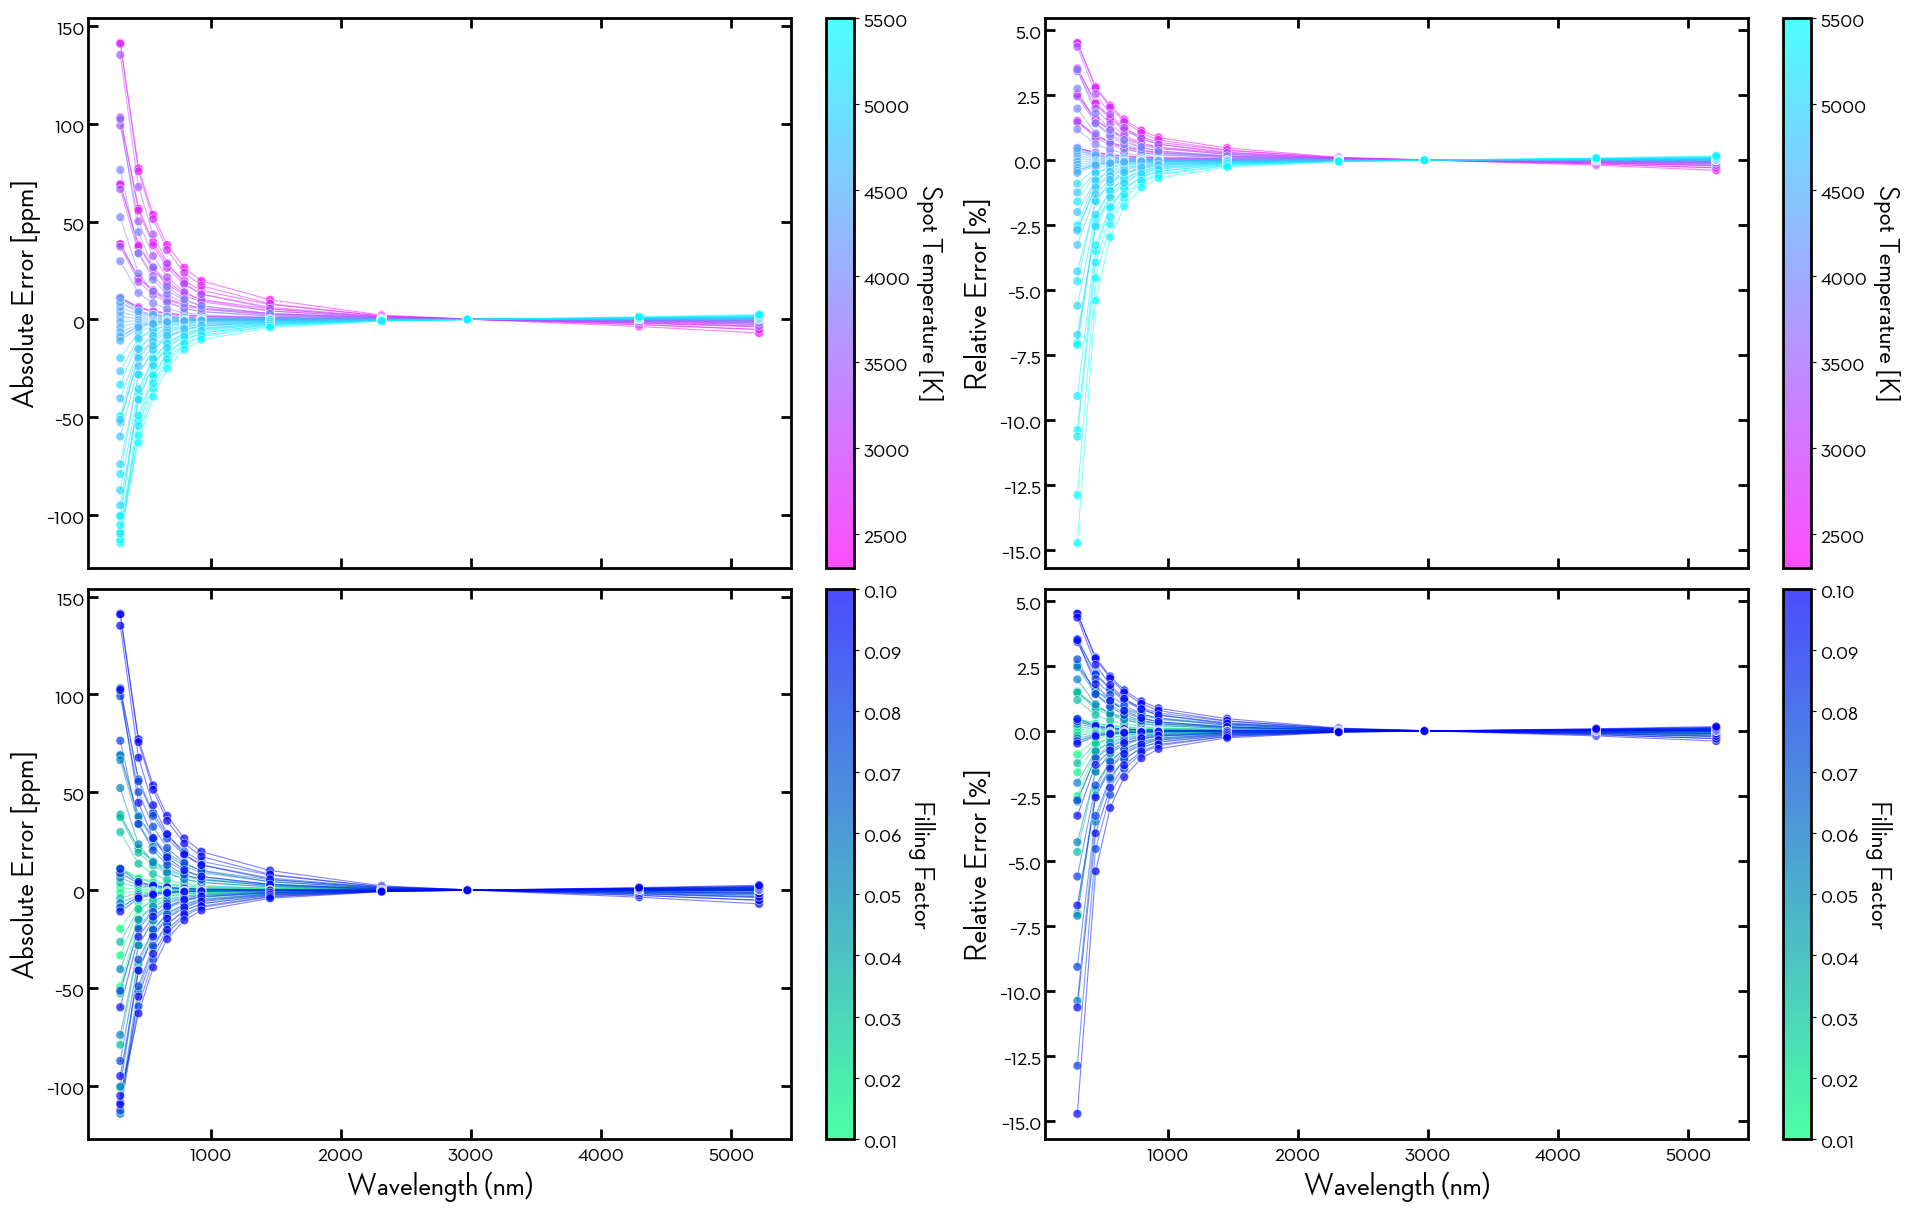

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import json
import pandas as pd

# Carregar dados do arquivo JSON
file_path = "Excalibur.591.WASP-74.cerberus.release.HST-WFC3-IR-G141-SCAN.json"
with open(file_path, "r") as f:
    json_data = json.load(f)

# Extrair dados do JSON
atmos_data = np.array(json_data["atmos"])
wavelength_json_nm = atmos_data[:, 0] * 1000  # Converter de microns para nm
model_radius_squared_ppm = atmos_data[:, 3] * 1e6  # Converter para ppm
min_model_radius = np.min(model_radius_squared_ppm)
normalized_model_radius_squared_ppm = model_radius_squared_ppm - min_model_radius

# Carregar dados do arquivo simulation_results.txt
data = np.loadtxt("simulation_results_K2-136c_Kurucz.txt", delimiter=',', skiprows=1)
f_spot, tempSpot, wavelength, D_lambda, epsilon_Rackham, epsilon_ourWork = data.T

# Filtrar dados válidos
mask = (f_spot > 0) & (~np.isnan(epsilon_Rackham)) & (~np.isnan(epsilon_ourWork))
f_spot = f_spot[mask]
tempSpot = tempSpot[mask]
wavelength = wavelength[mask]
D_lambda = D_lambda[mask]
epsilon_Rackham = epsilon_Rackham[mask]
epsilon_ourWork = epsilon_ourWork[mask]

# Calcular profundidades observadas e erros
D_obs_our = epsilon_ourWork * D_lambda
D_obs_rackham = epsilon_Rackham * D_lambda
error = D_obs_our - D_obs_rackham
rel_error = (error / D_obs_our) * 100


##### carregar os dados do trabalho de Fu et al 2021
file_path_csv = "WASP-74b (Fu et al. 2021).csv"
df_fu = pd.read_csv(file_path_csv)

# Remover espaços extras nos nomes das colunas
df_fu.columns = df_fu.columns.str.strip()

# Converter as unidades necessárias
wave_nm_fu = df_fu["wave(um)"] * 1000  # Converter microns para nm
rp_rs_squared_ppm_fu = (df_fu["Rp/Rs"] ** 2) * 1e6  # Converter (Rp/Rs)^2 para ppm

# Normalizar os dados de Fu et al. 2021
min_rp_rs_squared_fu = np.min(rp_rs_squared_ppm_fu)
normalized_rp_rs_squared_ppm_fu = rp_rs_squared_ppm_fu - min_rp_rs_squared_fu
##################

# Configurar figura
fig, axs = plt.subplots(2, 2, figsize=(19, 12), sharex=True, constrained_layout=True)
plt.rcParams['axes.linewidth'] = 2


cmap_temp = plt.get_cmap('cool_r')
cmap_ff = plt.get_cmap('winter_r')

# Normalizações
norm_temp = Normalize(tempSpot.min(), tempSpot.max())
norm_ff = Normalize(f_spot.min(), f_spot.max())

# Função genérica para plotagem
def plot_errors(ax, x, y, c, cmap, norm, xlabel, ylabel):
    scatter = ax.scatter(
        x, y,
        c=c,
        cmap=cmap,
        norm=norm,
        s=40,
        alpha=0.7,
        edgecolor='w',
        linewidth=0.5
    )
    #ax.grid(True, linestyle='--', alpha=0.6)
    ax.set_xlabel(xlabel, fontsize=23)
    ax.set_ylabel(ylabel, fontsize=23)
    return scatter

# Plotar gráficos de dispersão
sc1 = plot_errors(axs[0,0], wavelength, error, tempSpot, cmap_temp, norm_temp,
                '', 'Absolute Error [ppm]')
sc2 = plot_errors(axs[0,1], wavelength, rel_error, tempSpot, cmap_temp, norm_temp,
                '', 'Relative Error [%]')
sc3 = plot_errors(axs[1,0], wavelength, error, f_spot, cmap_ff, norm_ff,
                'Wavelength (nm)', 'Absolute Error [ppm]')
sc4 = plot_errors(axs[1,1], wavelength, rel_error, f_spot, cmap_ff, norm_ff,
                'Wavelength (nm)', 'Relative Error [%]')

# Adicionar linhas conectando pontos do mesmo grupo
unique_pairs = np.unique(np.column_stack((f_spot, tempSpot)), axis=0)

for pair in unique_pairs:
    f, t = pair
    mask = (f_spot == f) & (tempSpot == t)
    if np.sum(mask) < 2:
        continue
    
    # Ordenar por wavelength
    wl = wavelength[mask]
    sort_idx = np.argsort(wl)
    wl_sorted = wl[sort_idx]
    
    # Dados ordenados
    err_sorted = error[mask][sort_idx]
    rel_err_sorted = rel_error[mask][sort_idx]
    
    # Cores para as linhas
    color_temp = cmap_temp(norm_temp(t))
    color_ff = cmap_ff(norm_ff(f))
    
    # Plotar linhas
    axs[0,0].plot(wl_sorted, err_sorted, color=color_temp, lw=0.8, alpha=0.5, zorder=0)
    axs[0,1].plot(wl_sorted, rel_err_sorted, color=color_temp, lw=0.8, alpha=0.5, zorder=0)
    axs[1,0].plot(wl_sorted, err_sorted, color=color_ff, lw=0.8, alpha=0.5, zorder=0)
    axs[1,1].plot(wl_sorted, rel_err_sorted, color=color_ff, lw=0.8, alpha=0.5, zorder=0)
    
# # Adicionar os dados de Fu et al. 2021 ao gráfico 1 (axs[0,0]) e gráfico 3 (axs[1,0])
# axs[0, 0].plot(wave_nm_fu, normalized_rp_rs_squared_ppm_fu, '-', color='red', label="STIS - Fu et al. 2021 (normalized)", zorder=10)
# axs[1, 0].plot(wave_nm_fu, normalized_rp_rs_squared_ppm_fu, '-', color='red', label="STIS - Fu et al. 2021 (normalized)", zorder=10)

# # Adicionar modelo de raio planetário ao quadrado apenas nos gráficos 1 e 3
# axs[0, 0].plot(wavelength_json_nm, normalized_model_radius_squared_ppm, '-', linewidth=2, label="WFC3 (normalized)", 
#                color='black', alpha=0.5, zorder=10)
# legend1 = axs[0, 0].legend(loc='upper right', prop={'size': 17, 'weight': 'bold'})
# legend1.get_frame().set_linewidth(3)
# legend1.get_frame().set_edgecolor('black')
# legend1.get_frame().set_facecolor('white')

# axs[1, 0].plot(wavelength_json_nm, normalized_model_radius_squared_ppm, '-', linewidth=2, label="WFC3 (normalized)", 
#                color='black', alpha=0.5, zorder=10)
# legend2 = axs[1, 0].legend(loc='upper right', prop={'size': 17, 'weight': 'bold'})
# legend2.get_frame().set_linewidth(3)
# legend2.get_frame().set_edgecolor('black')
# legend2.get_frame().set_facecolor('white')


# legend1 = ax1.legend(loc='upper left', prop={'size': 12.9, 'weight': 'bold'})
# legend1.get_frame().set_linewidth(3)
# legend1.get_frame().set_edgecolor('black')
# legend1.get_frame().set_facecolor('white')
# legend2 = ax2.legend(loc='upper left', prop={'size': 12.9, 'weight': 'bold'})
# legend2.get_frame().set_linewidth(3)
# legend2.get_frame().set_edgecolor('black')
# legend2.get_frame().set_facecolor('white')


# Definir os títulos das barras de cores
colorbars = [
    (sc1, axs[0, 0], 'Spot Temperature [K]'),
    (sc2, axs[0, 1], 'Spot Temperature [K]'),
    (sc3, axs[1, 0], 'Filling Factor'),
    (sc4, axs[1, 1], 'Filling Factor')
]

# Adicionar barras de cores com um loop
for sc, ax, label in colorbars:
    cbar = fig.colorbar(sc, ax=ax)
    cbar.set_label(label, fontsize=21)
    cbar.ax.yaxis.label.set_rotation(270)  # Rotacionar o texto para a esquerda
    cbar.ax.yaxis.label.set_verticalalignment('bottom')  # Alinhar o texto por causa da rotação
    cbar.ax.tick_params(labelsize=17)  # Aumenta o tamanho dos valores


for ax in axs.flat:
    ax.tick_params(axis="x", direction="in", labelsize=17, which='both', width=2, length=7, pad=3, top=True)
    ax.tick_params(axis="y", direction="in", labelsize=17, which='both', width=2, length=7, pad=3, right=True)

plt.savefig("Figures/K2-136c_Kurucz_error_lambda.svg", format="svg")
plt.show()


findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'cursive' not found because none of the following families were found: Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, Comic Neue, Comic Sans MS, cursive


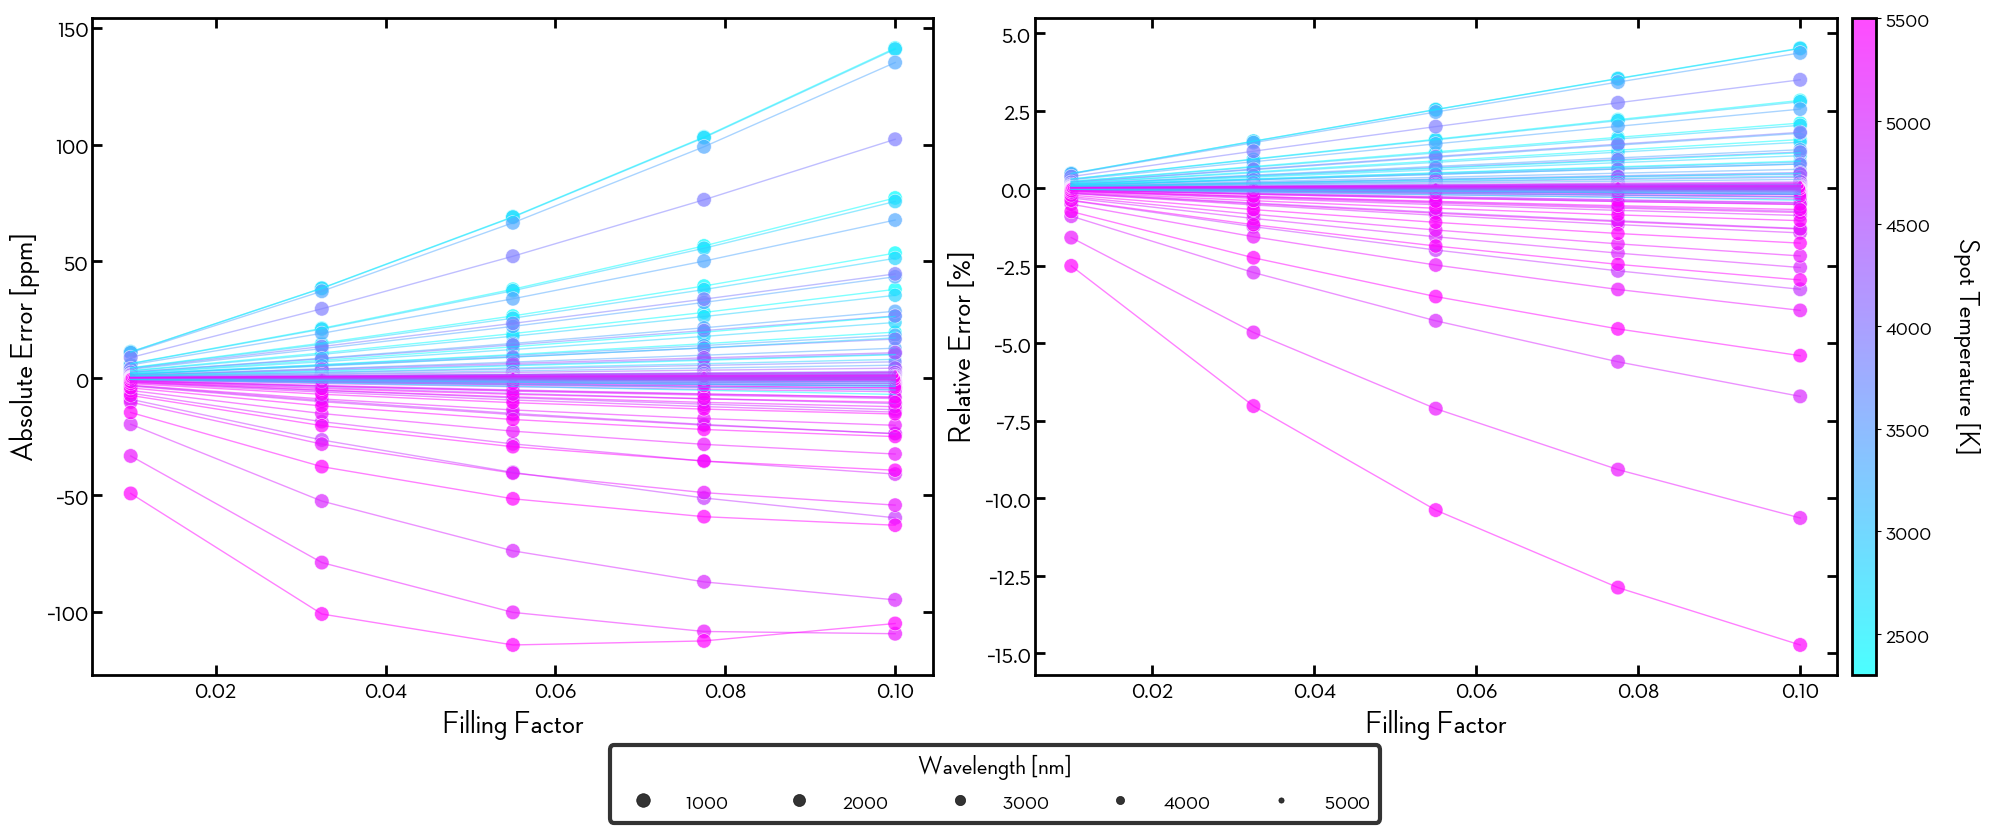

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Carregar dados
data = np.loadtxt("simulation_results_K2-136c_Kurucz.txt", delimiter=',', skiprows=1)
f_spot, tempSpot, wavelength, D_lambda, epsilon_Rackham, epsilon_ourWork = data.T

# Filtrar casos válidos
mask = (f_spot > 0) & (~np.isnan(epsilon_Rackham)) & (~np.isnan(epsilon_ourWork)) & (~np.isnan(D_lambda))
f_spot = f_spot[mask]
tempSpot = tempSpot[mask]
wavelength = wavelength[mask]
D_lambda = D_lambda[mask]
epsilon_Rackham = epsilon_Rackham[mask]
epsilon_ourWork = epsilon_ourWork[mask]

# Calcular profundidades observadas
D_obs_our = epsilon_ourWork * D_lambda
D_obs_rackham = epsilon_Rackham * D_lambda

# Calcular erros
abs_error = D_obs_our - D_obs_rackham  # Erro absoluto (com sinal)
rel_error = (abs_error / D_obs_our) * 100  # Erro relativo (%)

# Inverter tamanho dos símbolos (λ menor → símbolo maior)
sizes = 110 - ((wavelength - wavelength.min()) / (wavelength.max() - wavelength.min()) * 100)

# Configurar figura com espaçamento adequado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8), gridspec_kw={'width_ratios': [1, 1]})
plt.rcParams['axes.linewidth'] = 2

cmap_temp = plt.get_cmap('cool')
norm_temp = Normalize(tempSpot.min(), tempSpot.max())

# Função para plotar gráficos
def plot_errors(ax, error, title, ylabel, cmap, norm, add_colorbar=True):
    sc = ax.scatter(
        f_spot,
        error,
        c=tempSpot,
        cmap=cmap,
        norm=norm,
        s=sizes,
        alpha=0.7,
        edgecolor='w',
        linewidth=0.5
    )
    
    # Ajustando tamanho das fontes nos eixos e título
    ax.set_title(title, fontsize=23, fontweight='bold')  # Título com tamanho maior
    ax.set_xlabel('Filling Factor', fontsize=23, fontweight='bold')  # Rótulo do eixo X
    ax.set_ylabel(ylabel, fontsize=23, fontweight='bold')  # Rótulo do eixo Y
    
    # Adicionando a grade (descomente a linha abaixo se quiser ativá-la)
    # ax.grid(True, linestyle='--', alpha=0.6)
    
    if add_colorbar:
        # Criar um espaço corretamente ao lado do gráfico ax2
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="3%", pad=0.15)  # Ajusta tamanho e posição da colorbar
        
        cbar = plt.colorbar(sc, cax=cax)
        cbar.set_label('Spot Temperature [K]', fontsize=21, fontweight='bold', labelpad=15)
        cbar.ax.yaxis.label.set_rotation(270)  
        cbar.ax.yaxis.label.set_verticalalignment('bottom')  
        cbar.ax.tick_params(labelsize=17)

    return sc

# Plotar gráficos
sc1 = plot_errors(ax1, 
                 abs_error, 
                 '',
                 'Absolute Error [ppm]',
                 cmap_temp,
                 norm_temp,
                 add_colorbar=False)

sc2 = plot_errors(ax2, 
                 rel_error, 
                 '',
                 'Relative Error [%]',
                 cmap_temp,
                 norm_temp)

# Adicionar linhas conectando pontos com mesmo wavelength e tempSpot
unique_pairs = np.unique(np.column_stack((np.round(wavelength, 2), np.round(tempSpot, 2))), axis=0)

for pair in unique_pairs:
    wl, t = pair
    mask = (np.round(wavelength, 2) == wl) & (np.round(tempSpot, 2) == t)
    
    if np.sum(mask) < 2:
        continue
    
    # Ordenar por filling factor
    sort_idx = np.argsort(f_spot[mask])
    f_sorted = f_spot[mask][sort_idx]
    abs_sorted = abs_error[mask][sort_idx]
    rel_sorted = rel_error[mask][sort_idx]
    
    # Usar cor correspondente à temperatura
    line_color = cmap_temp(norm_temp(t))
    
    # Plotar linhas
    ax1.plot(f_sorted, abs_sorted, color=line_color, lw=1, alpha=0.5)
    ax2.plot(f_sorted, rel_sorted, color=line_color, lw=1, alpha=0.5)

# Adicionar legenda para tamanho dos símbolos (λ)
handles, labels = sc2.legend_elements(prop="sizes", 
                                      alpha=0.8, 
                                      num=5,
                                      func=lambda x: wavelength.max() - ((x - 10)/100)*(wavelength.max() - wavelength.min()))

legend = fig.legend(handles, labels, 
                   loc='lower center', 
                   title="Wavelength [nm]",
                   title_fontsize=19,
                   ncol=5,
                   prop={'size': 17, 'weight': 'bold'},
                   bbox_to_anchor=(0.5, -0.05),
                   frameon=True)


legend.get_frame().set_linewidth(3)
legend.get_frame().set_edgecolor('black')
legend.get_frame().set_facecolor('white')

ax1.tick_params(axis="x", direction="in", labelsize=19, which='both', width=2, length=7, pad=3, top=True)
ax1.tick_params(axis="y", direction="in", labelsize=19, which='both', width=2, length=7, pad=3, right=True)
ax2.tick_params(axis="x", direction="in", labelsize=19, which='both', width=2, length=7, pad=3, top=True)
ax2.tick_params(axis="y", direction="in", labelsize=19, which='both', width=2, length=7, pad=3, right=True)

plt.tight_layout()
plt.subplots_adjust(bottom=0.15)
plt.show()

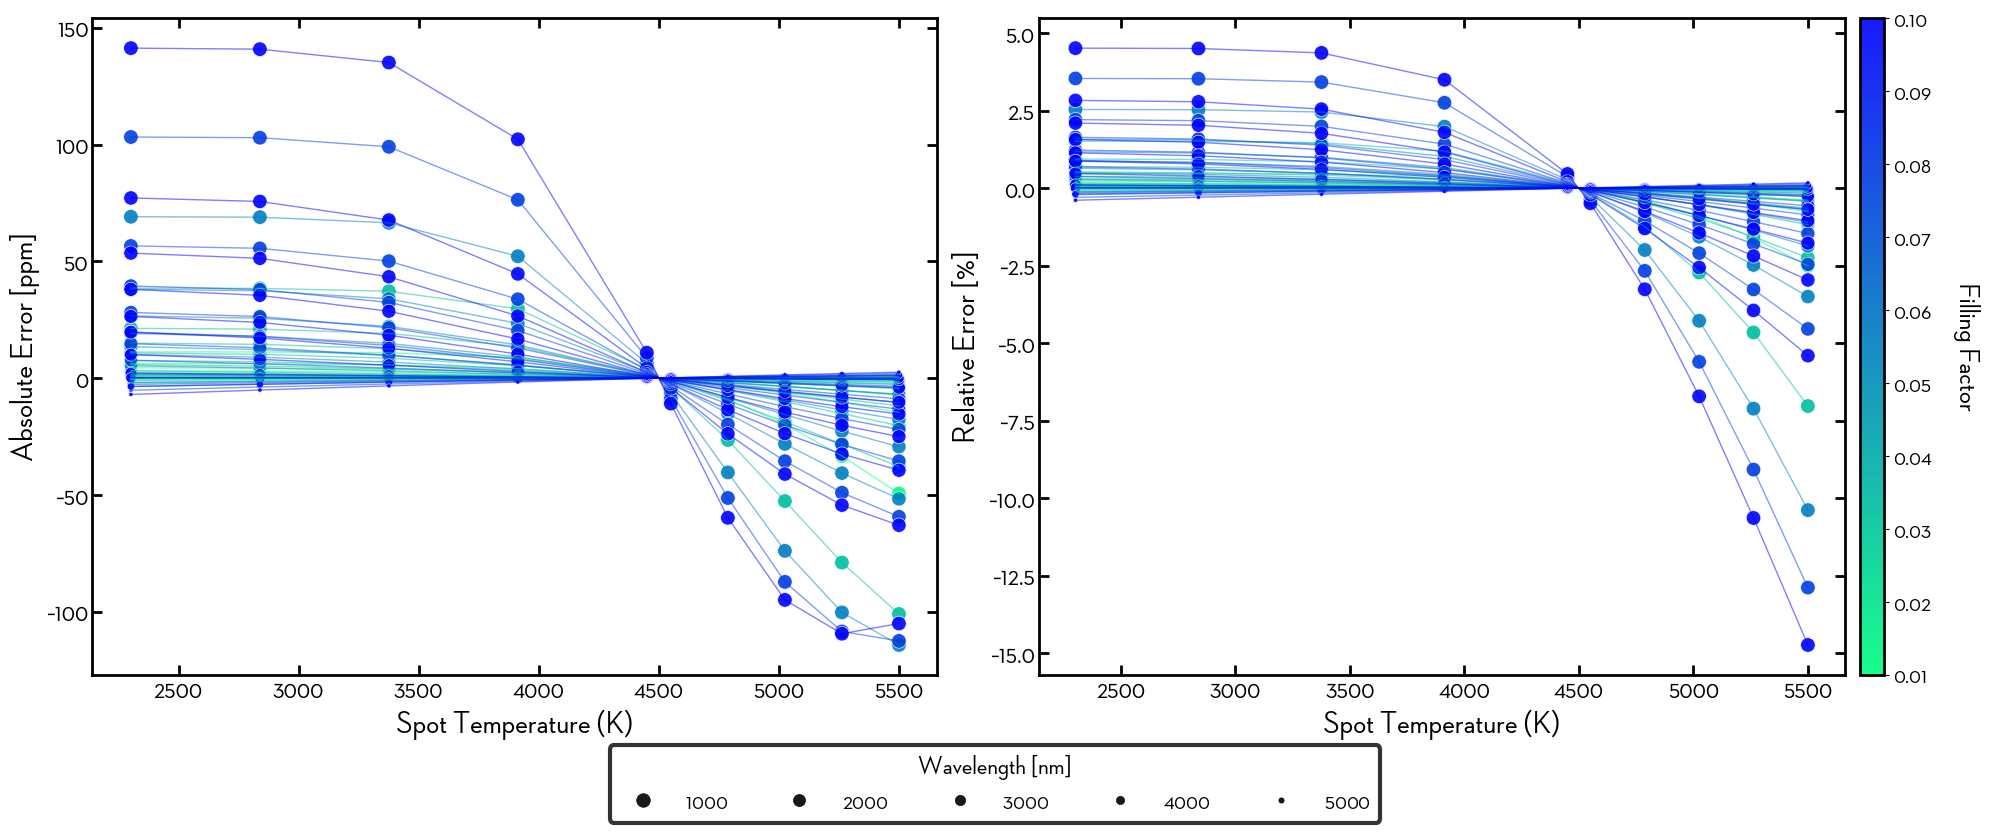

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Aumenta a largura das bordas dos eixos
plt.rcParams['axes.linewidth'] = 2

# Carregar dados
data = np.loadtxt("simulation_results_K2-136c_Kurucz.txt", delimiter=',', skiprows=1)
f_spot, tempSpot, wavelength, D_lambda, epsilon_Rackham, epsilon_ourWork = data.T

# Filtrar casos válidos
mask = (f_spot > 0) & (~np.isnan(epsilon_Rackham)) & (~np.isnan(epsilon_ourWork)) & (~np.isnan(D_lambda))
f_spot = f_spot[mask]
tempSpot = tempSpot[mask]
wavelength = wavelength[mask]
D_lambda = D_lambda[mask]
epsilon_Rackham = epsilon_Rackham[mask]
epsilon_ourWork = epsilon_ourWork[mask]

# Calcular profundidades observadas
D_obs_our = epsilon_ourWork * D_lambda
D_obs_rackham = epsilon_Rackham * D_lambda

# Calcular erros
abs_error = D_obs_our - D_obs_rackham   # Erro absoluto (com sinal)
rel_error = (abs_error / D_obs_our) * 100  # Erro relativo (%)

# Inverter tamanho dos símbolos (λ menor → símbolo maior)
sizes = 110 - ((wavelength - wavelength.min()) / (wavelength.max() - wavelength.min()) * 100)

# Configurar figura com dois subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8), gridspec_kw={'width_ratios': [1, 1]})
cmap_ff = plt.get_cmap('winter_r')  # Colormap para o filling factor
norm_ff = Normalize(f_spot.min(), f_spot.max())

# Função para plotar os gráficos com formatações similares ao primeiro código
def plot_errors(ax, error, title, ylabel, cmap, norm, add_colorbar=True):
    sc = ax.scatter(
        tempSpot,    # Eixo X: Spot Temperature
        error,       # Eixo Y: Erro (absoluto ou relativo)
        c=f_spot,    # Cor definida pelo filling factor
        cmap=cmap,
        norm=norm,
        s=sizes,
        alpha=0.9,
        edgecolor='w',
        linewidth=0.5
    )
    
    ax.set_title(title, fontsize=23, fontweight='bold')
    ax.set_xlabel('Spot Temperature (K)', fontsize=23, fontweight='bold')
    ax.set_ylabel(ylabel, fontsize=23, fontweight='bold')
    # Para ativar a grade, descomente a linha abaixo
    # ax.grid(True, linestyle='--', alpha=0.6)
    
    if add_colorbar:
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="3%", pad=0.15)
        cbar = plt.colorbar(sc, cax=cax)
        cbar.set_label('Filling Factor', fontsize=21, fontweight='bold', labelpad=15)
        cbar.ax.yaxis.label.set_rotation(270)
        cbar.ax.yaxis.label.set_verticalalignment('bottom')
        cbar.ax.tick_params(labelsize=17)
    
    return sc

# Plotar os dois gráficos
sc1 = plot_errors(ax1, 
                  abs_error, 
                  '', 
                  'Absolute Error [ppm]', 
                  cmap_ff, 
                  norm_ff, 
                  add_colorbar=False)

sc2 = plot_errors(ax2, 
                  rel_error, 
                  '', 
                  'Relative Error [%]', 
                  cmap_ff, 
                  norm_ff)

# Conectar pontos com mesmo filling factor e wavelength
unique_pairs = np.unique(np.column_stack((np.round(f_spot, 4), np.round(wavelength, 2))), axis=0)

for pair in unique_pairs:
    f_val, wl = pair
    mask_pair = (np.round(f_spot, 4) == f_val) & (np.round(wavelength, 2) == wl)
    
    if np.sum(mask_pair) < 2:
        continue
    
    # Ordenar os pontos por temperatura
    sort_idx = np.argsort(tempSpot[mask_pair])
    temp_sorted = tempSpot[mask_pair][sort_idx]
    abs_sorted = abs_error[mask_pair][sort_idx]
    rel_sorted = rel_error[mask_pair][sort_idx]
    
    # Definir a cor da linha com base no filling factor
    line_color = cmap_ff(norm_ff(f_val))
    
    ax1.plot(temp_sorted, abs_sorted, color=line_color, lw=1, alpha=0.5)
    ax2.plot(temp_sorted, rel_sorted, color=line_color, lw=1, alpha=0.5)

# Adicionar legenda para o tamanho dos símbolos (indicando o wavelength)
handles, labels = sc2.legend_elements(prop="sizes", 
                                      alpha=0.9, 
                                      num=5,
                                      func=lambda x: wavelength.max() - ((x - 10)/100) * (wavelength.max() - wavelength.min()))

legend = fig.legend(handles, labels, 
                    loc='lower center', 
                    title="Wavelength [nm]",
                    title_fontsize=19,
                    ncol=5,
                    prop={'size': 17, 'weight': 'bold'},
                    bbox_to_anchor=(0.5, -0.05),
                    frameon=True)

legend.get_frame().set_linewidth(3)
legend.get_frame().set_edgecolor('black')
legend.get_frame().set_facecolor('white')

# Ajustar os parâmetros dos eixos
ax1.tick_params(axis="x", direction="in", labelsize=19, which='both', width=2, length=7, pad=3, top=True)
ax1.tick_params(axis="y", direction="in", labelsize=19, which='both', width=2, length=7, pad=3, right=True)
ax2.tick_params(axis="x", direction="in", labelsize=19, which='both', width=2, length=7, pad=3, top=True)
ax2.tick_params(axis="y", direction="in", labelsize=19, which='both', width=2, length=7, pad=3, right=True)

plt.tight_layout()
plt.subplots_adjust(bottom=0.15)
plt.show()


/tmp/ipykernel_2885/2691547780.py:153: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


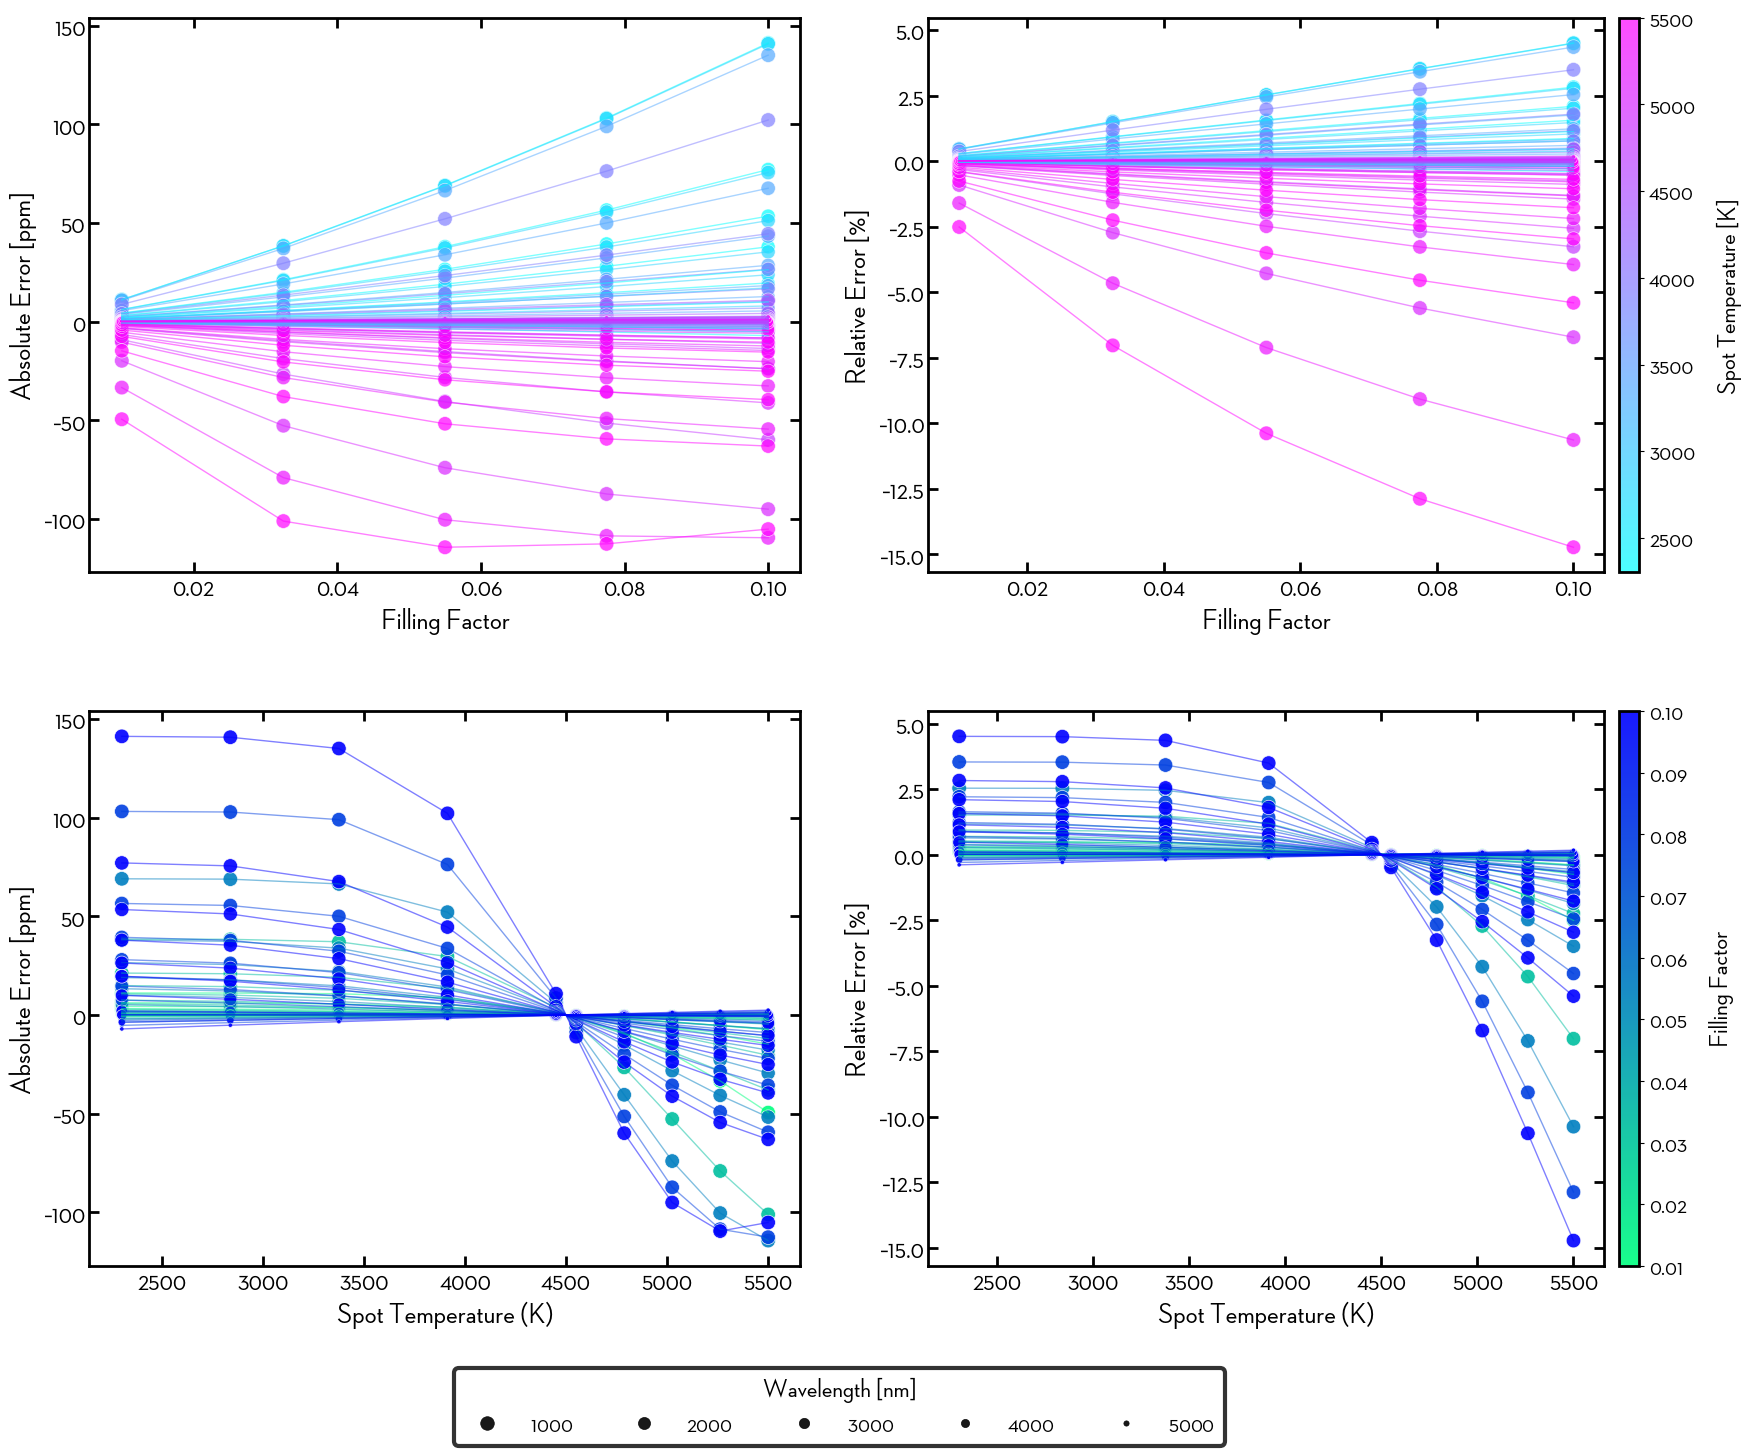

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Configurações gerais
plt.rcParams['axes.linewidth'] = 2
fig = plt.figure(figsize=(20, 16))
gs = fig.add_gridspec(2, 2, hspace=0.25, wspace=0.18)
ax1 = fig.add_subplot(gs[0, 0])  # Topo esquerda: f_spot vs abs_error
ax2 = fig.add_subplot(gs[0, 1])  # Topo direita: f_spot vs rel_error
ax3 = fig.add_subplot(gs[1, 0])  # Baixo esquerda: tempSpot vs abs_error
ax4 = fig.add_subplot(gs[1, 1])  # Baixo direita: tempSpot vs rel_error

# [...] (Carregar dados e cálculos permanecem IGUAIS aos seus scripts originais)

# ===========================================
# Primeira linha: Gráficos vs f_spot (Topo)
# ===========================================
cmap_temp = plt.get_cmap('cool')
norm_temp = Normalize(tempSpot.min(), tempSpot.max())

def plot_top_row(ax, error, ylabel):
    sc = ax.scatter(
        f_spot,
        error,
        c=tempSpot,
        cmap=cmap_temp,
        norm=norm_temp,
        s=sizes,
        alpha=0.7,
        edgecolor='w',
        linewidth=0.5
    )
    ax.set_xlabel('Filling Factor', fontsize=21, fontweight='bold')
    ax.set_ylabel(ylabel, fontsize=21, fontweight='bold')
    return sc

# Plotar gráficos do topo
sc1 = plot_top_row(ax1, abs_error, 'Absolute Error [ppm]')
sc2 = plot_top_row(ax2, rel_error, 'Relative Error [%]')

# Adicionar linhas conectando pontos (MESMA LÓGICA DO PRIMEIRO SCRIPT)
unique_pairs_top = np.unique(np.column_stack((np.round(wavelength, 2), np.round(tempSpot, 2))), axis=0)

for pair in unique_pairs_top:
    wl, t = pair
    mask = (np.round(wavelength, 2) == wl) & (np.round(tempSpot, 2) == t)
    
    if np.sum(mask) < 2:
        continue
    
    # Ordenar por filling factor
    sort_idx = np.argsort(f_spot[mask])
    f_sorted = f_spot[mask][sort_idx]
    abs_sorted = abs_error[mask][sort_idx]
    rel_sorted = rel_error[mask][sort_idx]
    
    # Cor baseada na temperatura (cmap_temp)
    line_color = cmap_temp(norm_temp(t))
    
    ax1.plot(f_sorted, abs_sorted, color=line_color, lw=1, alpha=0.5)
    ax2.plot(f_sorted, rel_sorted, color=line_color, lw=1, alpha=0.5)

# Colorbar para temperatura (topo)
divider = make_axes_locatable(ax2)
cax_top = divider.append_axes("right", size="3%", pad=0.15)
cbar_top = plt.colorbar(sc2, cax=cax_top)
cbar_top.set_label('Spot Temperature [K]', fontsize=19, fontweight='bold', labelpad=15)
cbar_top.ax.tick_params(labelsize=17)

# ===========================================
# Segunda linha: Gráficos vs tempSpot (Baixo)
# ===========================================
cmap_ff = plt.get_cmap('winter_r')
norm_ff = Normalize(f_spot.min(), f_spot.max())

def plot_bottom_row(ax, error, ylabel):
    sc = ax.scatter(
        tempSpot,
        error,
        c=f_spot,
        cmap=cmap_ff,
        norm=norm_ff,
        s=sizes,
        alpha=0.9,
        edgecolor='w',
        linewidth=0.5
    )
    ax.set_xlabel('Spot Temperature (K)', fontsize=21, fontweight='bold')
    ax.set_ylabel(ylabel, fontsize=21, fontweight='bold')
    return sc

# Plotar gráficos de baixo
sc3 = plot_bottom_row(ax3, abs_error, 'Absolute Error [ppm]')
sc4 = plot_bottom_row(ax4, rel_error, 'Relative Error [%]')

# Adicionar linhas conectando pontos (MESMA LÓGICA DO SEGUNDO SCRIPT)
unique_pairs_bottom = np.unique(np.column_stack((np.round(f_spot, 4), np.round(wavelength, 2))), axis=0)

for pair in unique_pairs_bottom:
    f_val, wl = pair
    mask = (np.round(f_spot, 4) == f_val) & (np.round(wavelength, 2) == wl)
    
    if np.sum(mask) < 2:
        continue
    
    # Ordenar por temperatura
    sort_idx = np.argsort(tempSpot[mask])
    temp_sorted = tempSpot[mask][sort_idx]
    abs_sorted = abs_error[mask][sort_idx]
    rel_sorted = rel_error[mask][sort_idx]
    
    # Cor baseada no filling factor (cmap_ff)
    line_color = cmap_ff(norm_ff(f_val))
    
    ax3.plot(temp_sorted, abs_sorted, color=line_color, lw=1, alpha=0.5)
    ax4.plot(temp_sorted, rel_sorted, color=line_color, lw=1, alpha=0.5)

# Colorbar para filling factor (baixo)
divider = make_axes_locatable(ax4)
cax_bottom = divider.append_axes("right", size="3%", pad=0.15)
cbar_bottom = plt.colorbar(sc4, cax=cax_bottom)
cbar_bottom.set_label('Filling Factor', fontsize=19, fontweight='bold', labelpad=15)
cbar_bottom.ax.tick_params(labelsize=17)

# ===========================================
# Legenda única para wavelength (ambas linhas)
# ===========================================
handles, labels = sc4.legend_elements(prop="sizes", 
                                     alpha=0.9, 
                                     num=5,
                                     func=lambda x: wavelength.max() - ((x - 10)/100) * (wavelength.max() - wavelength.min()))

legend = fig.legend(handles, labels, 
                   loc='lower center', 
                   title="Wavelength [nm]",
                   title_fontsize=19,
                   ncol=5,
                   prop={'size': 17, 'weight': 'bold'},
                   bbox_to_anchor=(0.5, -0.02),
                   frameon=True)

legend.get_frame().set_linewidth(3)
legend.get_frame().set_edgecolor('black')
legend.get_frame().set_facecolor('white')

# Ajustar ticks para todos os eixos
for ax in [ax1, ax2, ax3, ax4]:
    ax.tick_params(axis="x", direction="in", labelsize=19, width=2, length=7, pad=3, top=True)
    ax.tick_params(axis="y", direction="in", labelsize=19, width=2, length=7, pad=3, right=True)

plt.tight_layout()
plt.subplots_adjust(bottom=0.1)  # Espaço para a legenda
plt.savefig("Figures/K2-136c_Kurucz_ff_T.svg", format="svg")
plt.show()

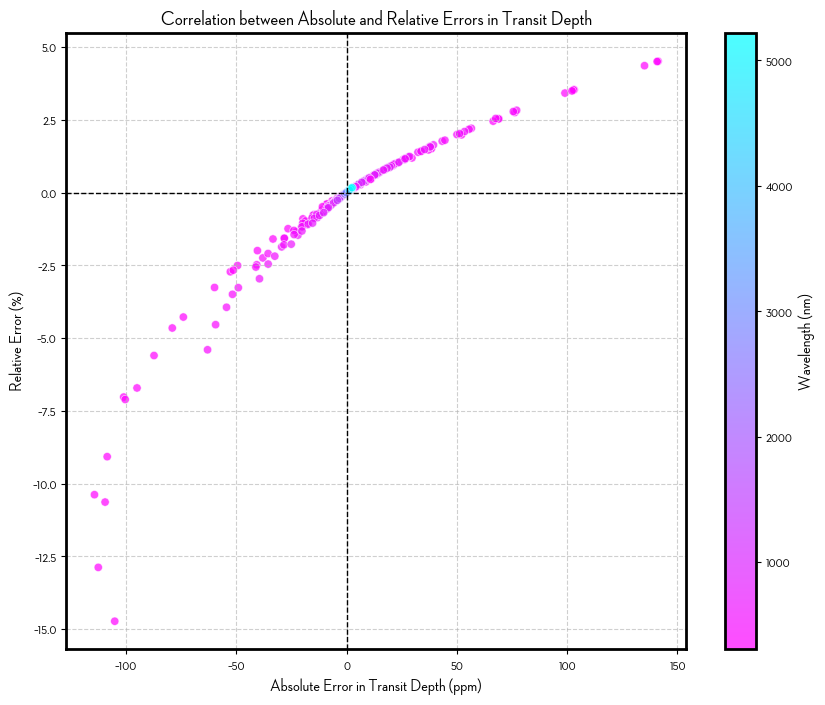

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

# Load data
data = np.loadtxt("simulation_results_K2-136c_Kurucz.txt", delimiter=',', skiprows=1)
f_spot, tempSpot, wavelength, D_lambda, epsilon_Rackham, epsilon_ourWork = data.T  # Now D_lambda is loaded

# Filter valid cases
mask = (f_spot > 0) & (~np.isnan(epsilon_Rackham)) & (~np.isnan(epsilon_ourWork))
f_spot = f_spot[mask]
tempSpot = tempSpot[mask]
wavelength = wavelength[mask]
D_lambda = D_lambda[mask]  # Transit depth without spots
epsilon_Rackham = epsilon_Rackham[mask]
epsilon_ourWork = epsilon_ourWork[mask]

# Compute actual transit depths and errors
D_obs_our = epsilon_ourWork * D_lambda      # Our observed transit depth (with spots)
D_obs_rackham = epsilon_Rackham * D_lambda    # Rackham's transit depth (with spots)

# Calculate SIGNED errors (preserving the sign to indicate faculae vs. spots)
error = D_obs_our - D_obs_rackham              # Absolute error in transit depth (in ppm)
rel_error = (error / D_obs_our) * 100           # Relative error (in %)

# Create a single scatter plot correlating absolute error vs. relative error
plt.figure(figsize=(10, 8))
sc = plt.scatter(error, rel_error, 
                 c=wavelength,           # color code by wavelength (you can change this if desired)
                 cmap='cool_r', 
                 alpha=0.7, 
                 edgecolor='w', 
                 linewidth=0.5)

plt.xlabel('Absolute Error in Transit Depth (ppm)', fontsize=12)
plt.ylabel('Relative Error (%)', fontsize=12)
plt.title('Correlation between Absolute and Relative Errors in Transit Depth', fontsize=14)

# Add a colorbar to show the mapping of wavelength
cbar = plt.colorbar(sc)
cbar.set_label('Wavelength (nm)', fontsize=12)

# Draw reference lines at 0 for guidance
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.axvline(0, color='black', linestyle='--', linewidth=1)
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

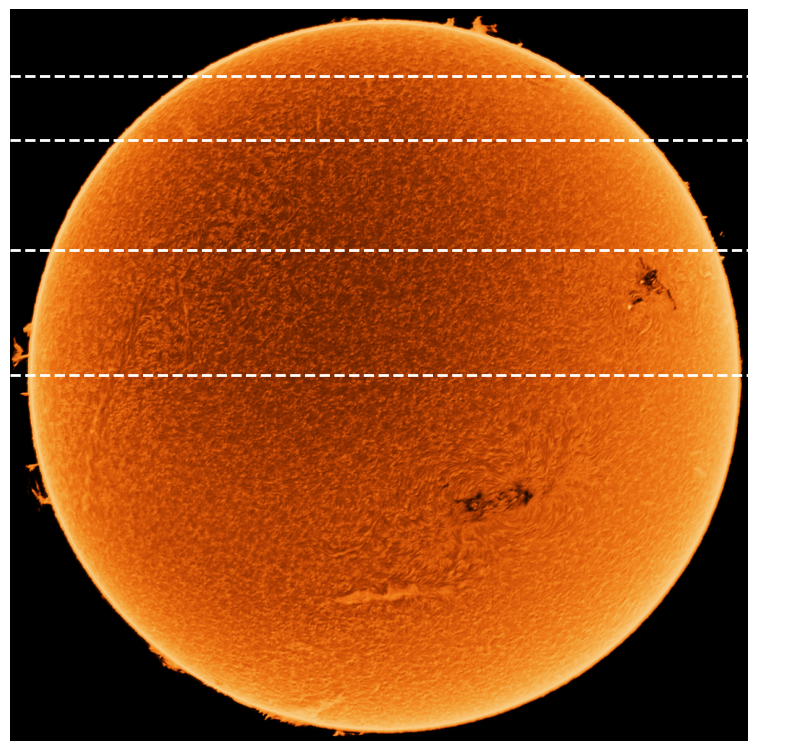

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO

image_path = "Sun.png"  # Ajuste para o seu caminho
sun_image = Image.open(image_path)

# Converter a imagem para um array numpy
sun_array = np.array(sun_image)

# Obter tamanho da imagem
img_width, img_height = sun_image.size

# Criar a figura e os eixos
fig, ax = plt.subplots(figsize=(10, 10))

# Exibir a imagem
ax.imshow(sun_image)

# Definir as latitudes desejadas em graus
latitudes = [0, 20, 40, 55]

# Adicionar as linhas de latitude
for lat in latitudes:
    y = img_height / 2 - (img_height / 2) * np.sin(np.radians(lat))  # Ajuste para centro da imagem
    ax.plot([0, img_width], [y, y], 'w--', linewidth=2)  # Linhas tracejadas brancas

# Remover os eixos para um visual mais limpo
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)

# Exibir a imagem com as marcações
plt.show()